In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.figure_factory as fffig
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import squarify

In [2]:
df = pd.read_csv('multipleChoiceResponses.csv', encoding='latin-1', low_memory=False)

In [3]:
df.describe(include='all')

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [5]:
temp_series = df['GenderSelect'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")


In [6]:
df['GenderSelect'].describe()
df['GenderSelect'].value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

In [7]:
con_df = pd.DataFrame(df['Country'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_resp', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_resp,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [8]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_resp'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(56, 142, 60)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ''),
      ) ]
layout = dict(
    title = '',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

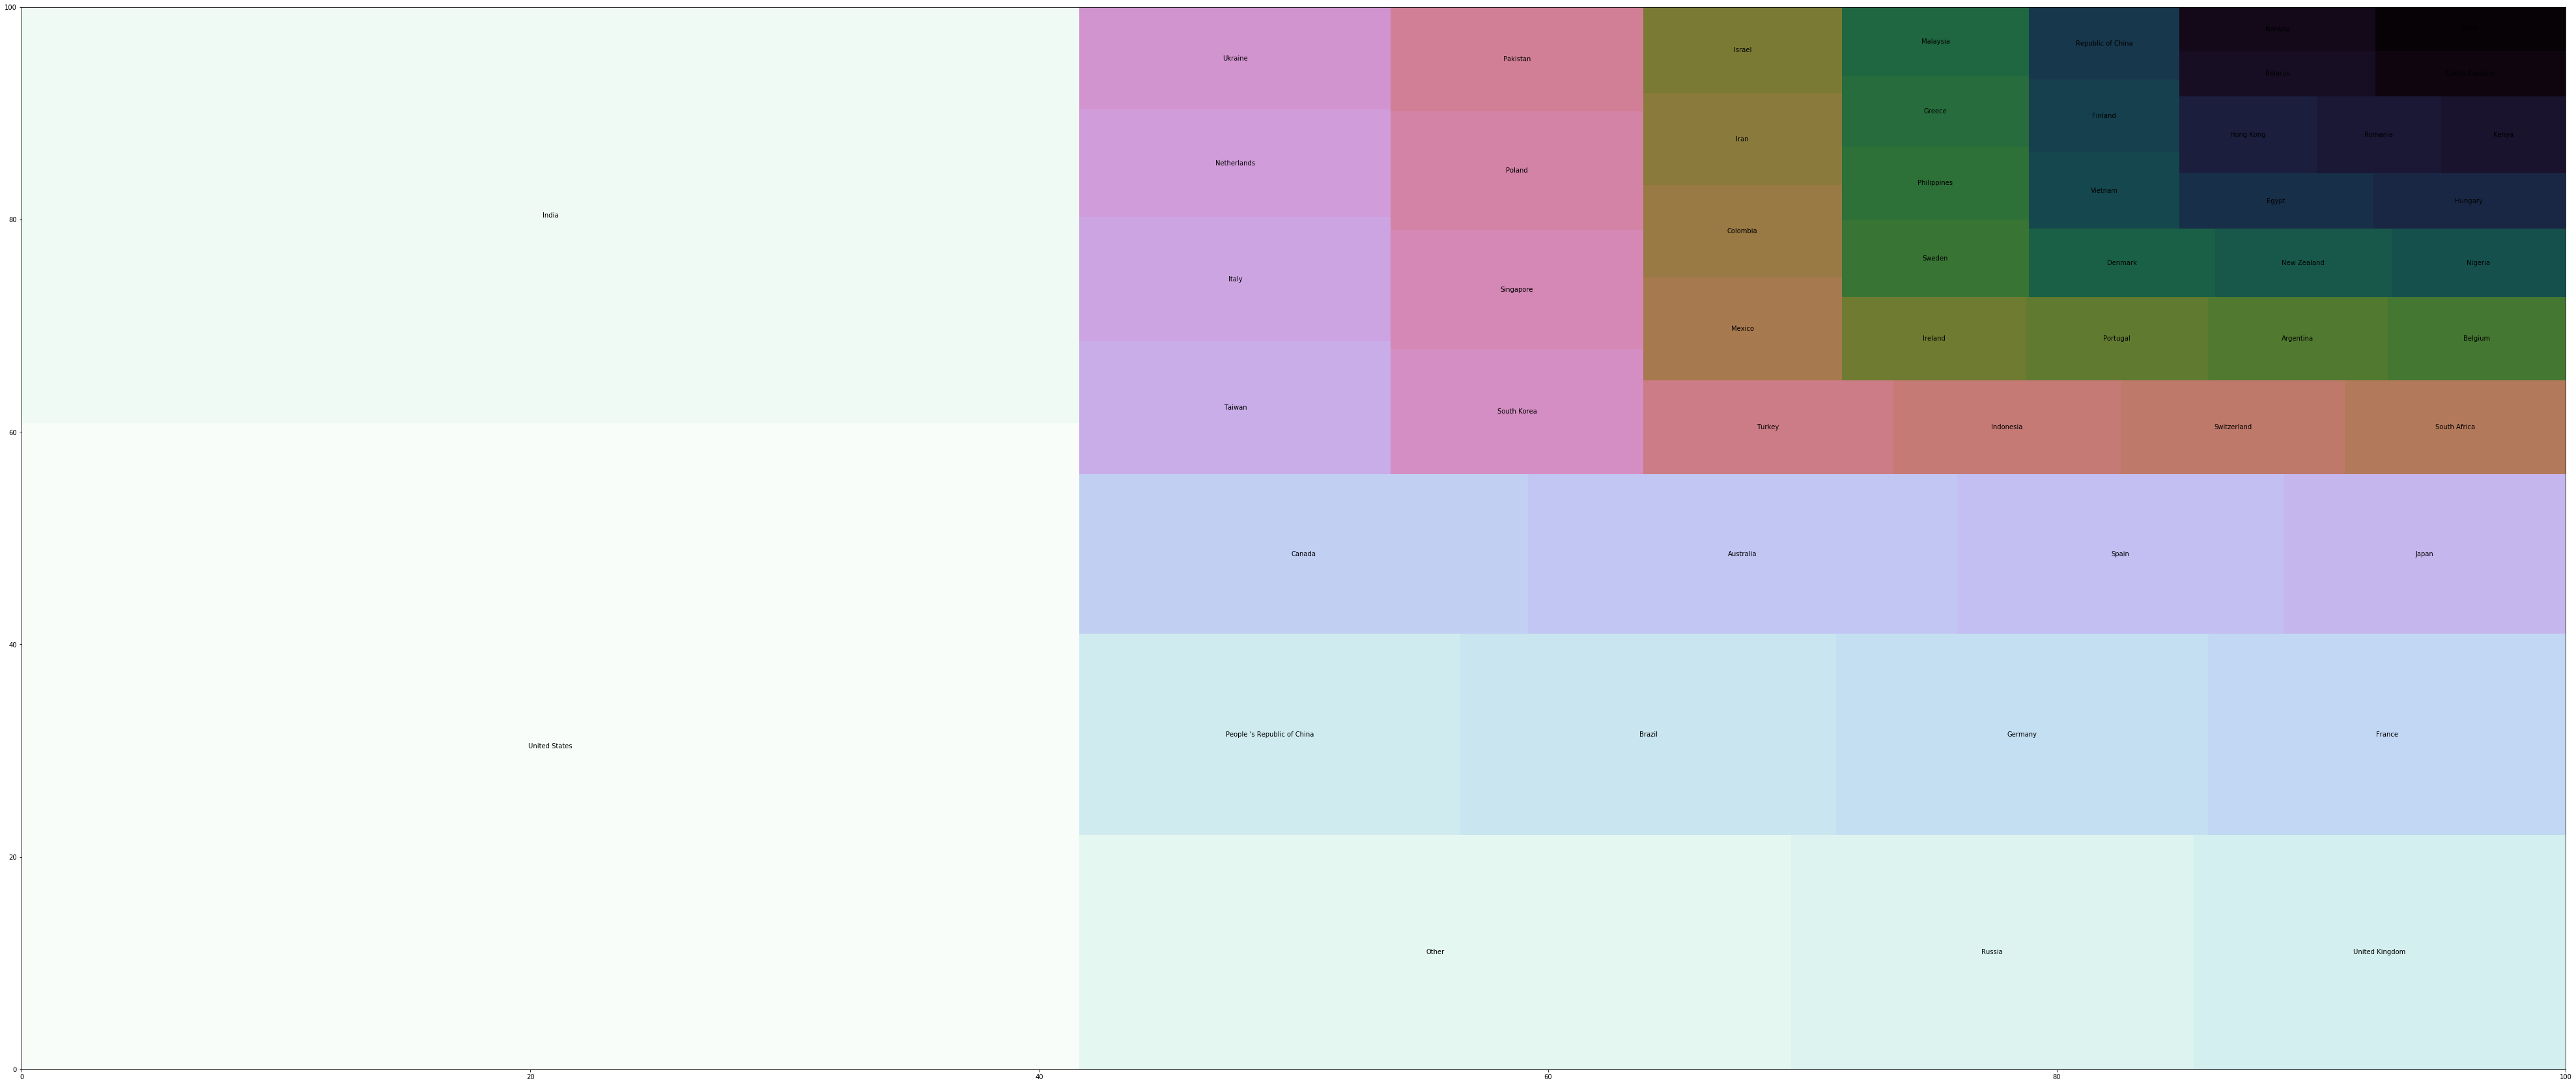

In [9]:
tree=df['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('cubehelix_r',52))
plt.rcParams.update({'font.size':45})
fig=plt.gcf()
fig.set_size_inches(70,30)
plt.show()

In [10]:
df['Country'].describe()

count             16595
unique               52
top       United States
freq               4197
Name: Country, dtype: object

# Age Description

In [11]:
df['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [12]:
fig = fffig.create_distplot([df[df['Age'] > 0]['Age']], ['age'])
py.iplot(fig, filename='Basic Distplot')

In [13]:
age_usa = df.groupby('Country').get_group('United States')
age_india = df.groupby('Country').get_group('India')

In [14]:
u_fig = fffig.create_distplot([age_usa[age_usa['Age'] > 0]['Age']], ['age'])
py.iplot(u_fig, filename='Basic Distplot')

In [15]:
i_fig = fffig.create_distplot([age_india[age_india['Age'] > 0]['Age']], ['age'])
py.iplot(i_fig, filename='Basic Distplot')

In [16]:
cnt_srs = df['FormalEducation'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title=''
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="formaleducation")

In [17]:
cnt_srs = df['Tenure'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale='Jet',
        showscale=True
    ),
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="tenure")
plt.show()

In [18]:
temp_series = df['CareerSwitcher'].value_counts()
py.iplot(fig, filename="CareerSwitcher")

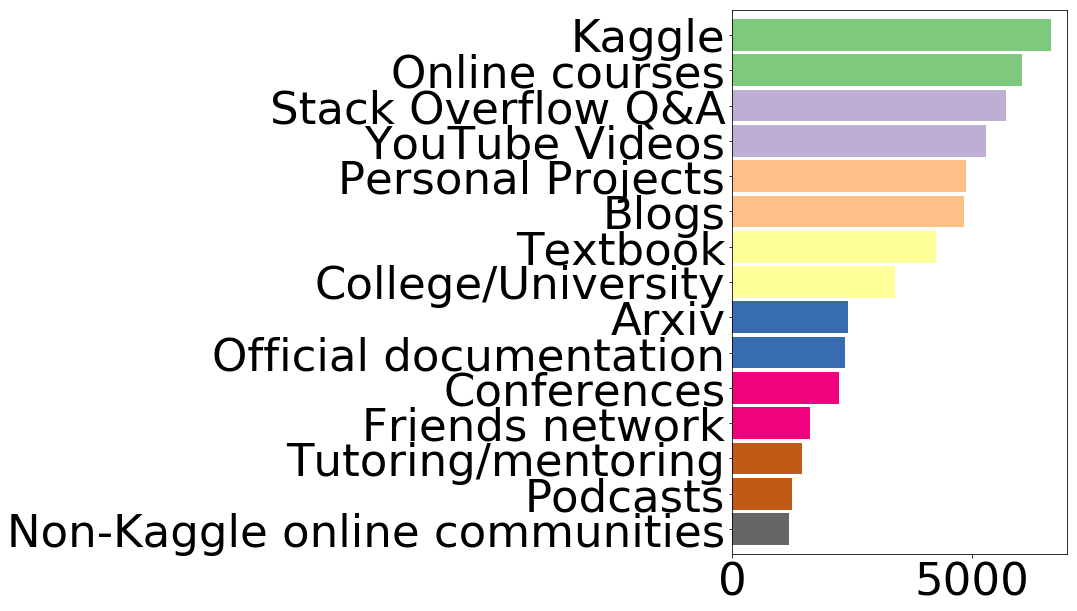

In [19]:
plt.subplots(figsize=(6,10))
learn=df['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Accent_r',15))
plt.show()

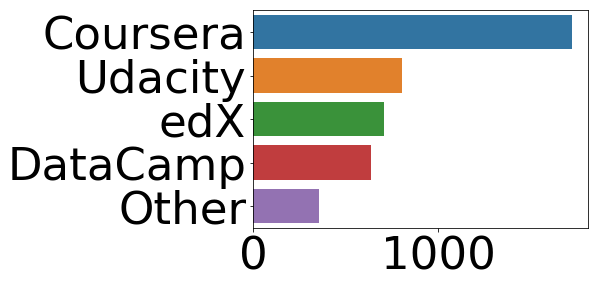

In [20]:
df['CoursePlatformSelect'] = df['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
t = df.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t = t[t != 'nan'].value_counts()
sns.barplot(y=t.index, x=t)

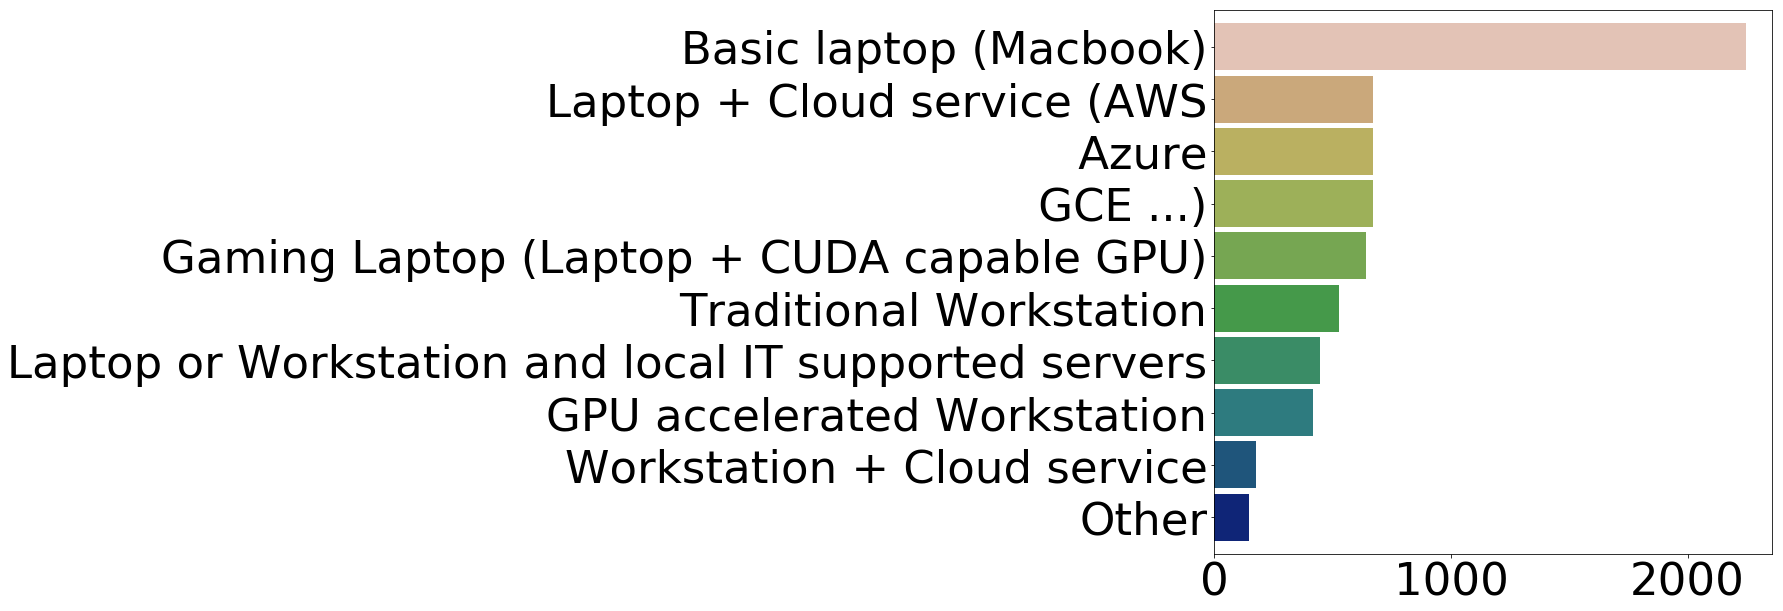

In [21]:
plt.subplots(figsize=(10,10))
hard=df['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('gist_earth',10))
plt.show()

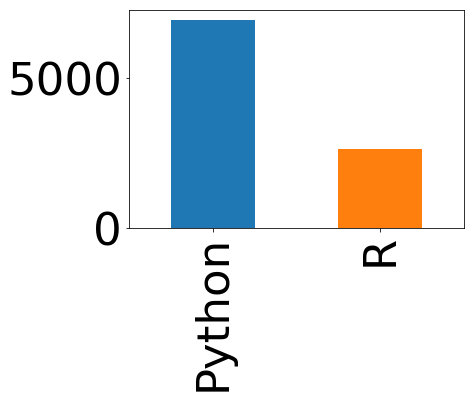

In [22]:
df['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

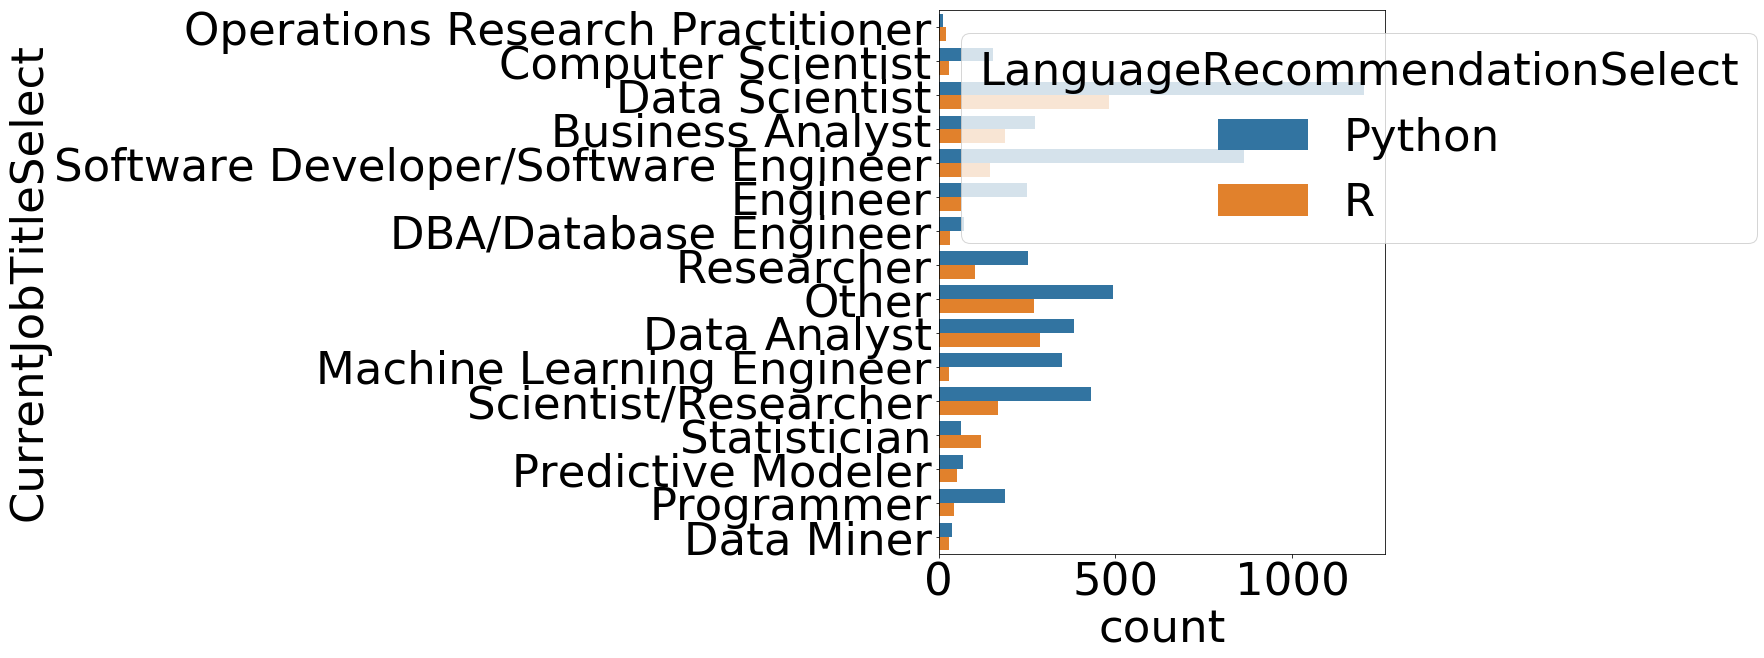

In [23]:
data = df[(df['CurrentJobTitleSelect'].notnull()) & ((df['LanguageRecommendationSelect'] == 'Python') | (df['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8,10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

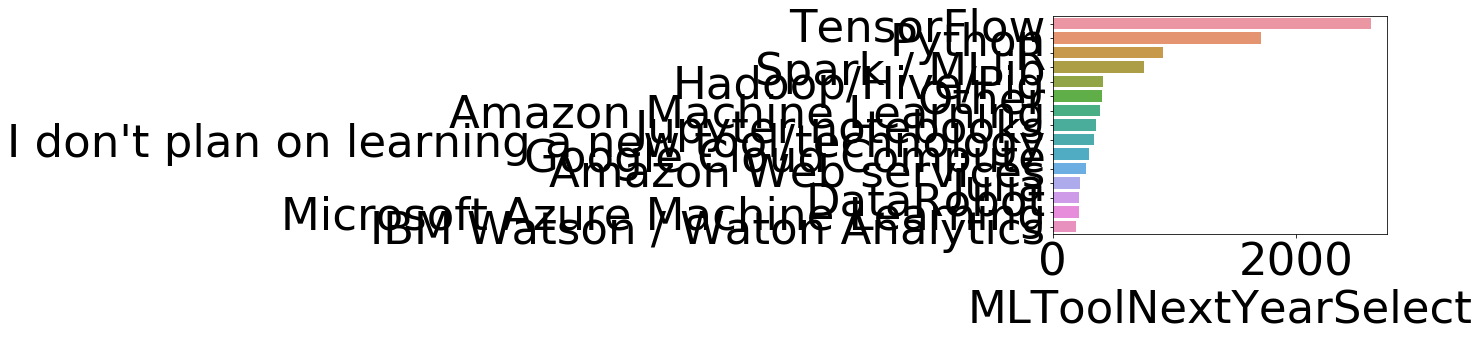

In [24]:
data = df['MLToolNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

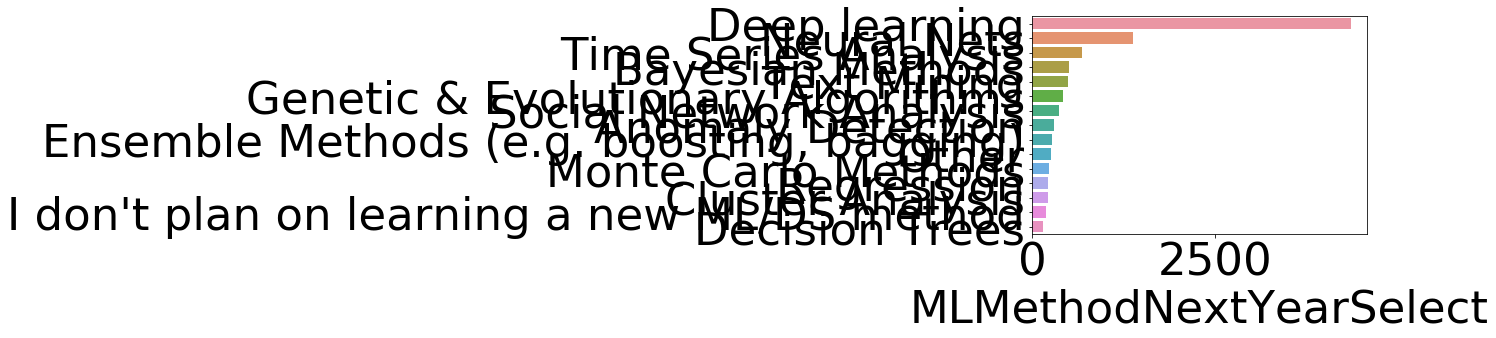

In [25]:
data = df['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

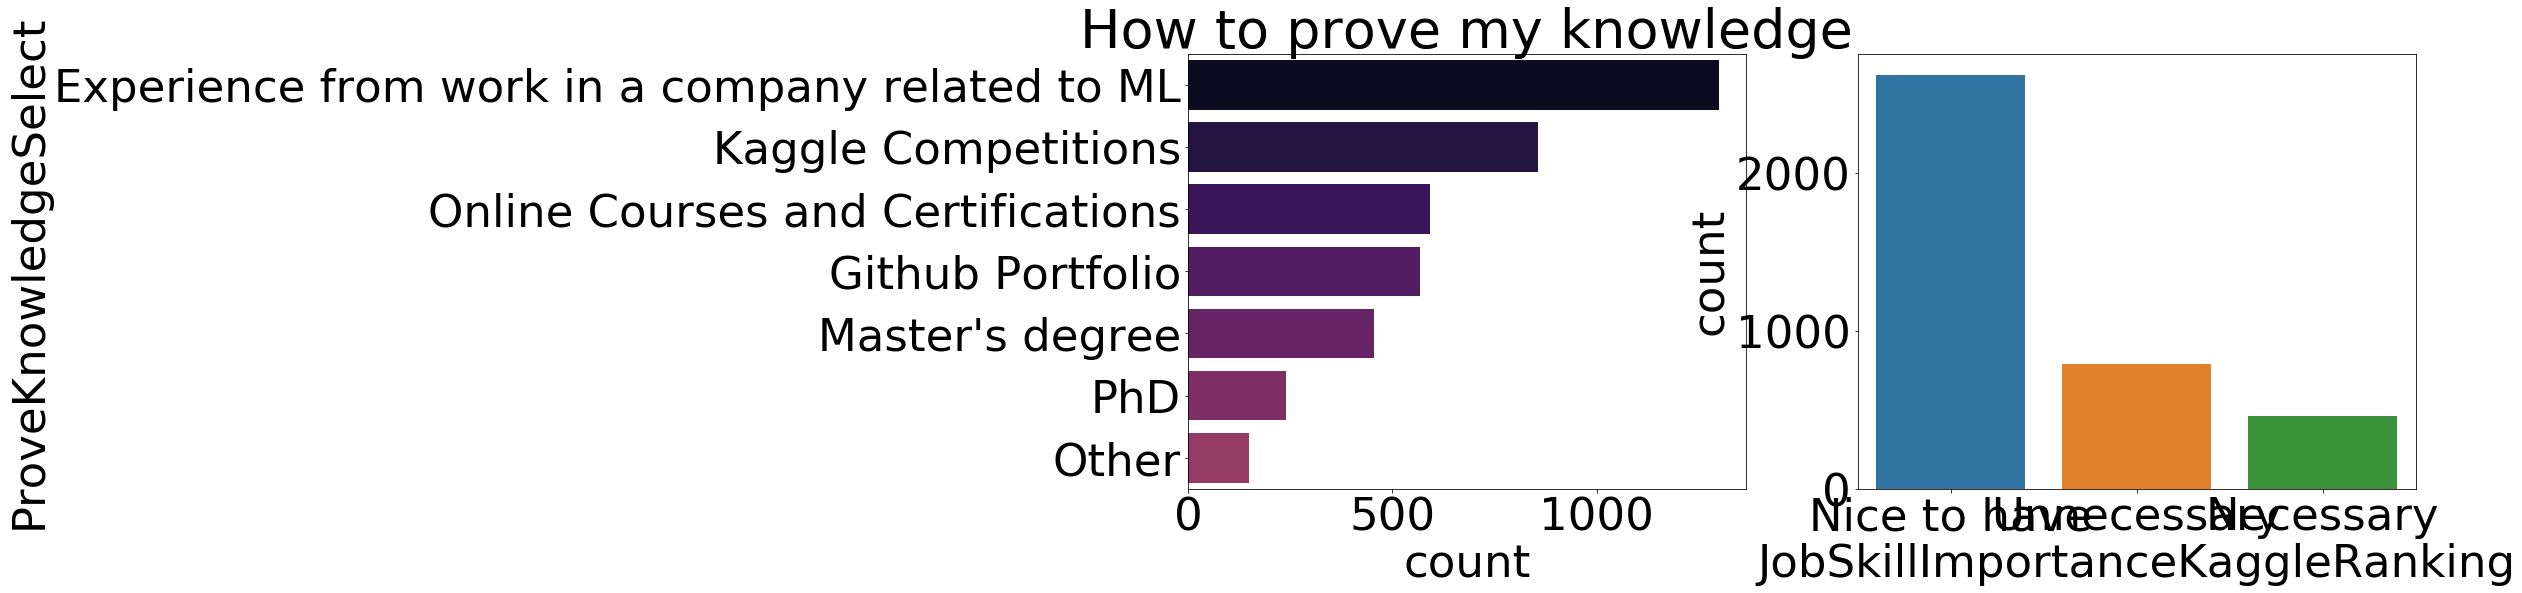

In [26]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=df['ProveKnowledgeSelect'],order=df['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(df['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('')
plt.show()

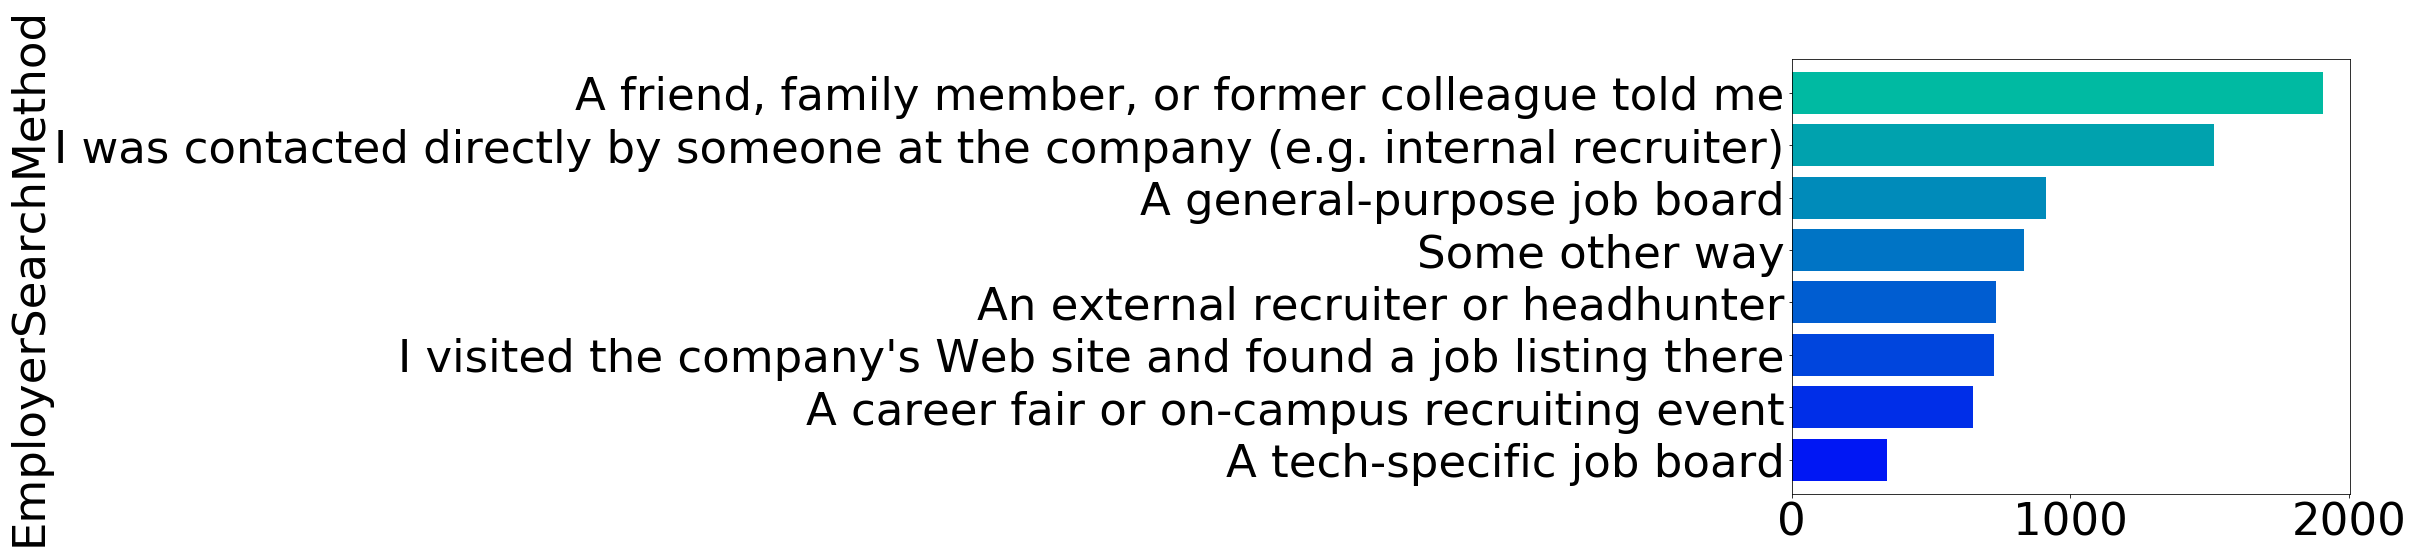

In [27]:
plt.subplots(figsize=(10,8))
df.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.show()

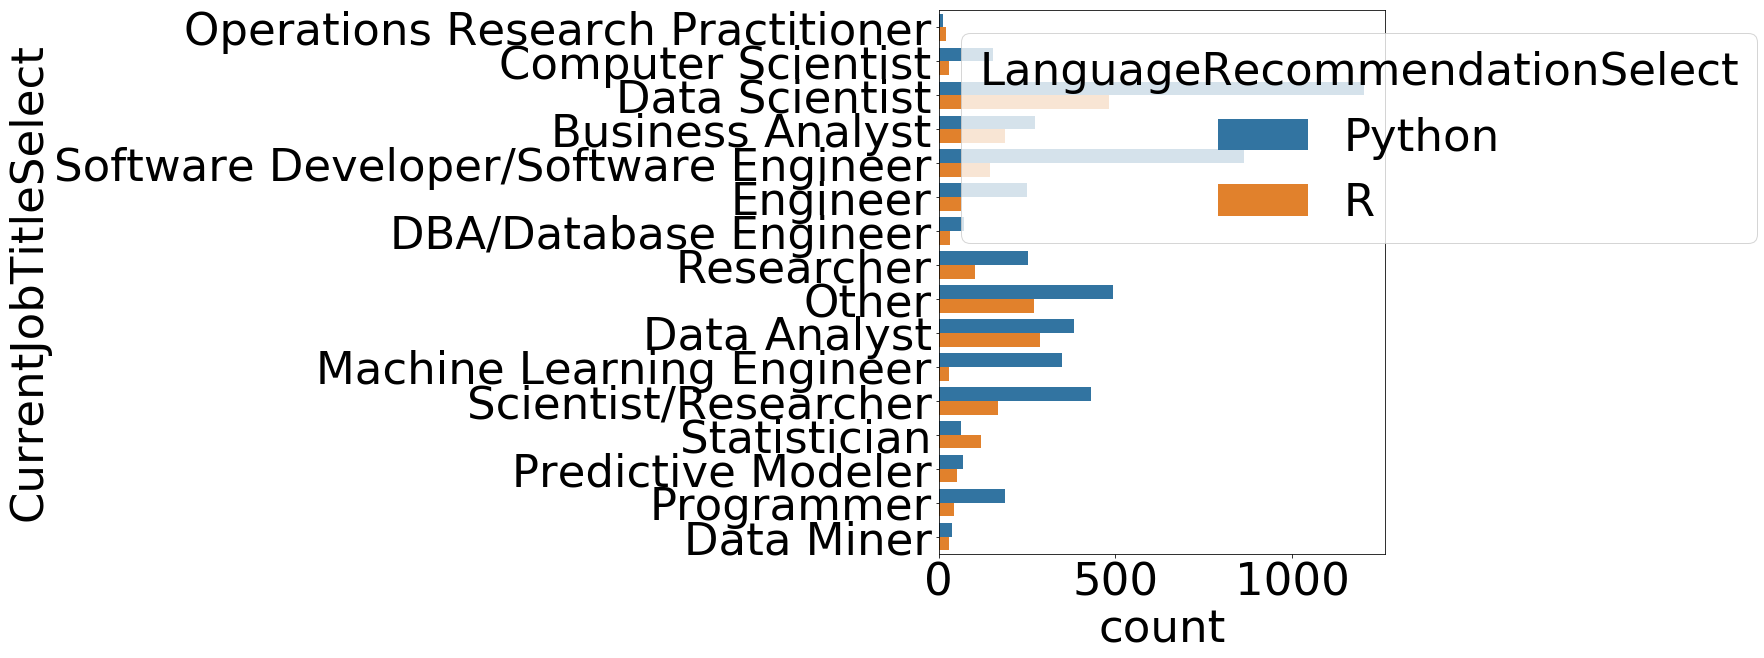

In [28]:
data = df[(df['CurrentJobTitleSelect'].notnull()) & ((df['LanguageRecommendationSelect'] == 'Python') | (df['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

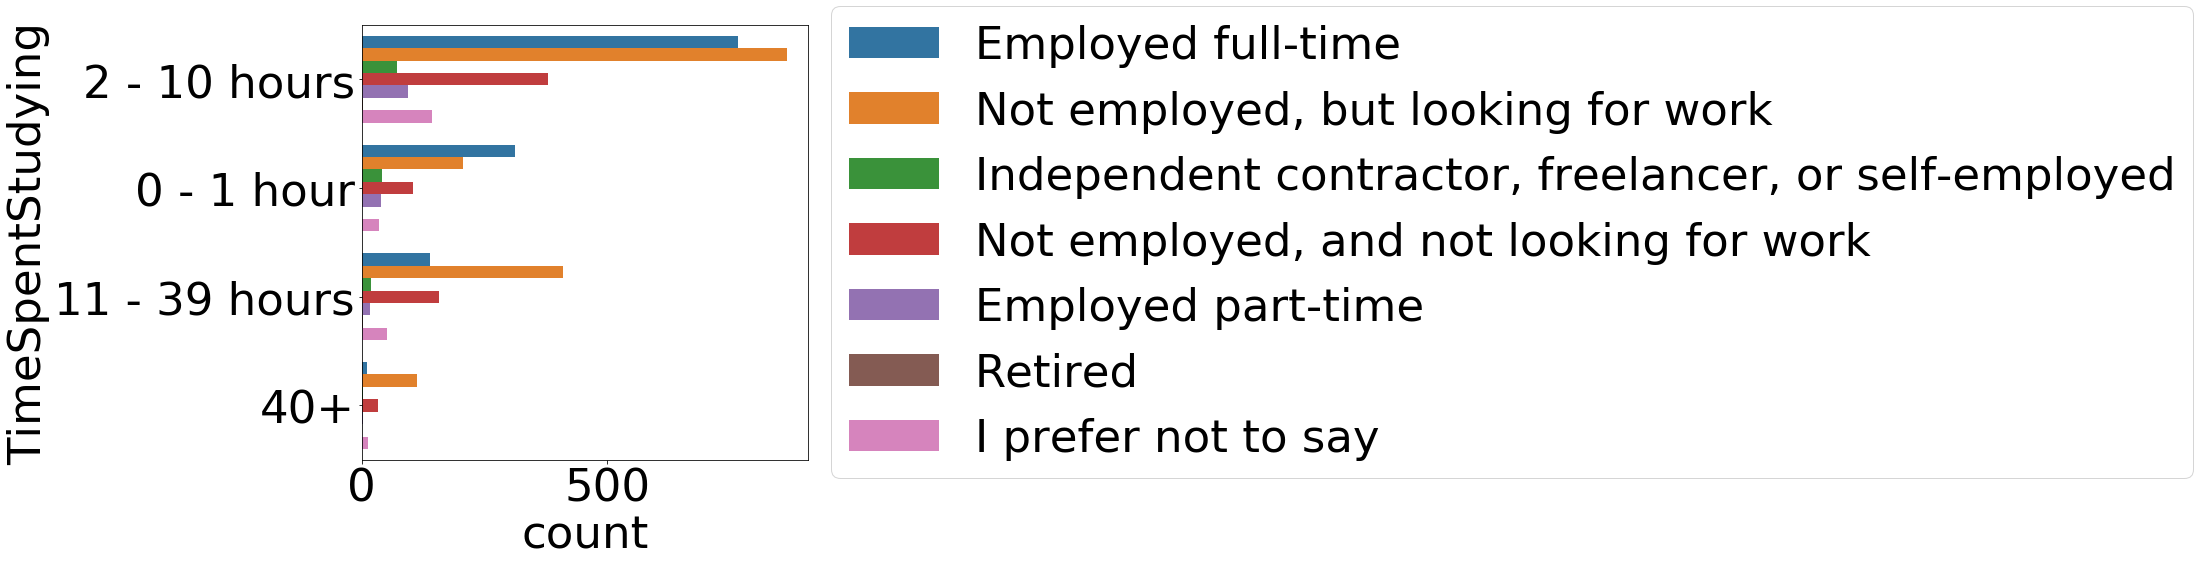

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=df, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
temp_series = df['DataScienceIdentitySelect'].value_counts()
py.iplot(fig, filename="DataScienceIdentitySelect")

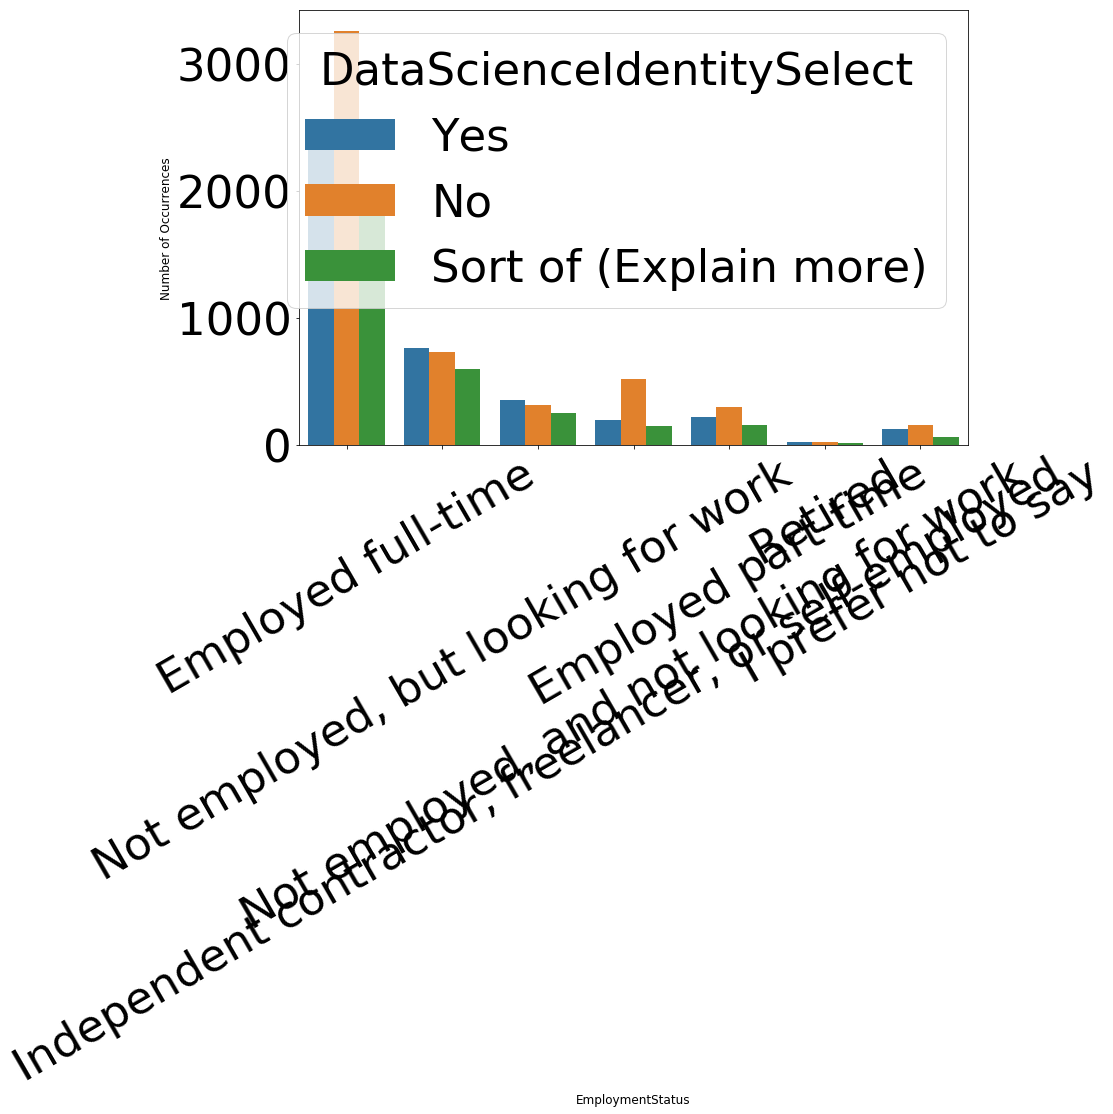

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='EmploymentStatus', hue='DataScienceIdentitySelect', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('EmploymentStatus', fontsize=12)
plt.xticks(rotation=30)
plt.show()